In [50]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords # To remove useless words
from nltk.stem.lancaster import LancasterStemmer

# imprt packages tat help to create document term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [51]:
#Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# Read the csv
df = pd.read_csv('./train.csv',encoding='utf-8')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [53]:
# check on the count of rows - dataset
df.shape

(159571, 8)

- Can see that there are about  159571 comments present in the dataset, with about 8 columns. In those comment_text contains the comment, rest of the columns can be considered as the deciding factor/target variable (excluding id as it just is present to differentiate the comments).

In [54]:
# Check for Null values
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [55]:
# check for additional information, if null or data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [56]:
# check on the min and max value of each numerical column
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Can see that the numerical values have a min value of 0 and max value of 1. Each of the features - toxic, severe_toxic, obscene, threat, insult, identity_hate have a min value of 0 indicating that feature isnt present for the comment. Further the max value for those features is 1, indicating that it is present for the comment, stating that it is toxic. 
- Rest of the values within the feature dont speak out much. For instance - As they are calculating mean and standard deviation for all the values within the feature.

In [57]:
# check on one of the comments present

df['comment_text'].values[289]

"I'm focussing on doing science at the moment (leading the revolution!)."

In [58]:
# toxic comment
df['comment_text'].values[43]

'FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!'

In [59]:
df['comment_text'].values[100]

'However, the Moonlite edit noted by golden daph was me (on optus ...)  Wake up wikkis.  So funny'

In [60]:
# Exploratory Data Analysis


In [61]:
df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [62]:
# check the percentage of comments that are toxic compared to normal comments
df.toxic.value_counts(normalize=True)

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64

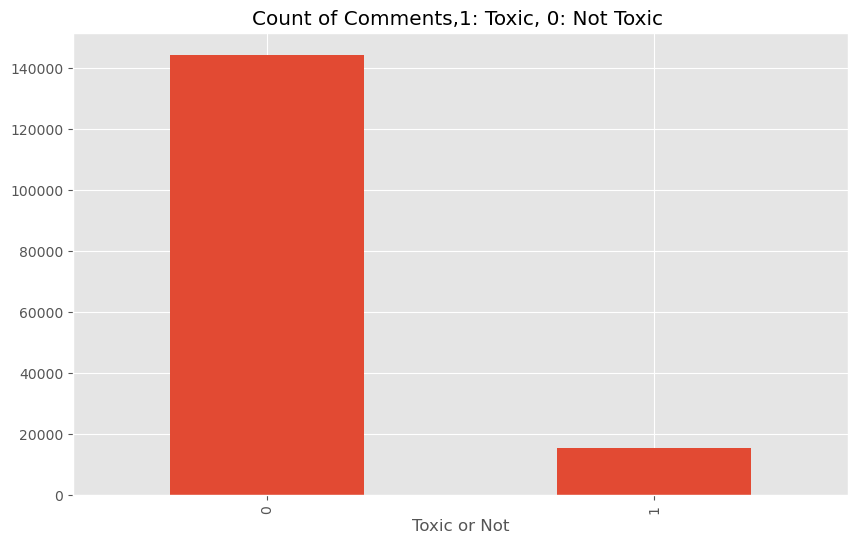

In [63]:
ax = df['toxic'].value_counts().sort_index() \
    .plot( kind='bar', 
           title ='Count of Comments,1: Toxic, 0: Not Toxic ',
           figsize=(10,6))
ax.set_xlabel('Toxic or Not')
plt.show()

In [64]:
# Check on the toxic comments, hence filtering data 
d = df.query('toxic == 1')
d['comment_text'].count()

15294

In [65]:
d

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [66]:
# create a new subset of data by only taking the target i.e. toxic indicating features 
df_count = df.iloc[:,2:].sum()
df_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

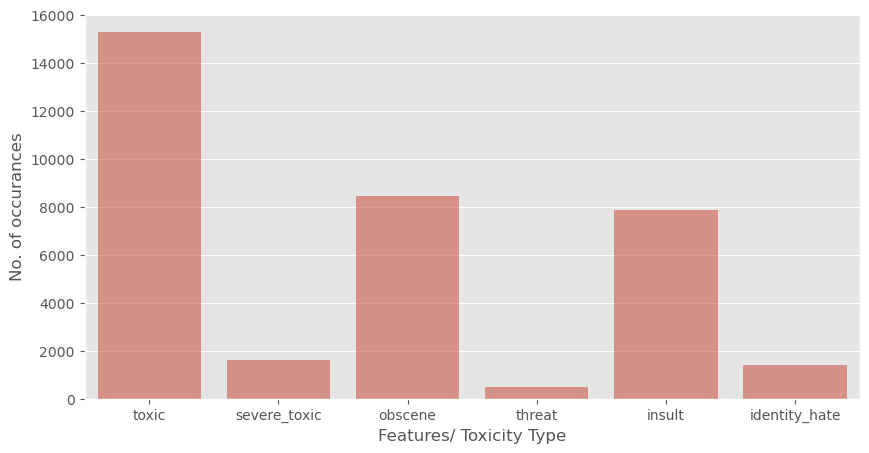

In [67]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x= df_count.index,y = df_count.values, alpha=0.6)
ax.set_xlabel('Features/ Toxicity Type')
ax.set_ylabel('No. of occurances')

plt.show()

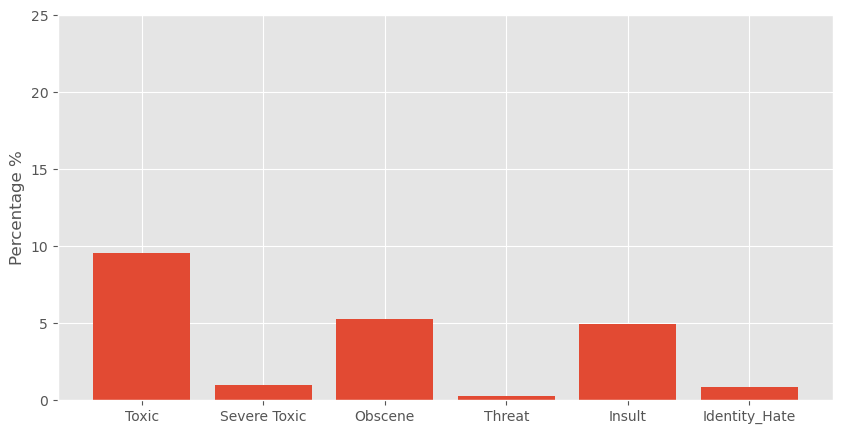

In [68]:
plt.figure(figsize=(10,5))
# Plot percentage of each of the toxicity type feature 
sum_tox = (df['toxic'].sum()/ len(df) )*100
sum_sev = (df['severe_toxic'].sum()/ len(df) )*100
sum_obs = (df['obscene'].sum()/ len(df) )*100
sum_thr = (df['threat'].sum()/ len(df) )*100
sum_ins = (df['insult'].sum()/ len(df) )*100
sum_ide = (df['identity_hate'].sum()/ len(df) )*100

ax = plt.bar(np.arange(6),[sum_tox,sum_sev,sum_obs,sum_thr,sum_ins,sum_ide])
plt.ylabel('Percentage %')
plt.yticks(np.arange(0,30,5))
plt.xticks(np.arange(6), ('Toxic','Severe Toxic', 'Obscene', 'Threat', 'Insult','Identity_Hate'))
plt.show()

In [69]:
# Pre-process the data

In [70]:
#Before preprocessing
df['comment_text'][40]

'"\n Sure, but the lead must briefly summarize Armenia\'s history. I simply added what I found necessary. If anyone thinks this or that sentence is redundant for the lead, they are welcome to remove make edits.  talk  "'

In [71]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

def preprocess(comment):
    #print(comment)

    # remove all numbers with letters attached to them
    comment =re.sub('\w*\d\w*', ' ', comment)

    # Remove all ''t' in the string and replace it with a 't'
    comment = re.sub("\'t", "t", comment)

    # Remove all ''st' in the string and replace it with a 's'
    comment = re.sub("\'s", "s", comment)

    # replace punctuation with white space and use of .lower() to convert all strings to lowercase 
    comment = re.sub('[%s]' % re.escape(string.punctuation), ' ', comment.lower())

    # Remove all '\n' in the string and replace it with a space
    comment = re.sub("\n", " ", comment)

    # Remove all '\t' in the string and replace it with a space
    comment = re.sub("\t", " ", comment)

    # Remove all non-ascii characters 
    comment = re.sub(r'[^\x00-\x7f]',r' ', comment)
    return comment

# Preprocess the comments column
df['comment_text'] = df['comment_text'].apply(lambda comment: preprocess(comment))


#preprocess(df.iloc[0].comment_text)

In [72]:
df['comment_text'][40]

'   sure  but the lead must briefly summarize armenias history  i simply added what i found necessary  if anyone thinks this or that sentence is redundant for the lead  they are welcome to remove make edits   talk   '

In [73]:
# Word Cloud

In [74]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud#, STOPWORDS, ImageColorGenator
from nltk.corpus import stopwords


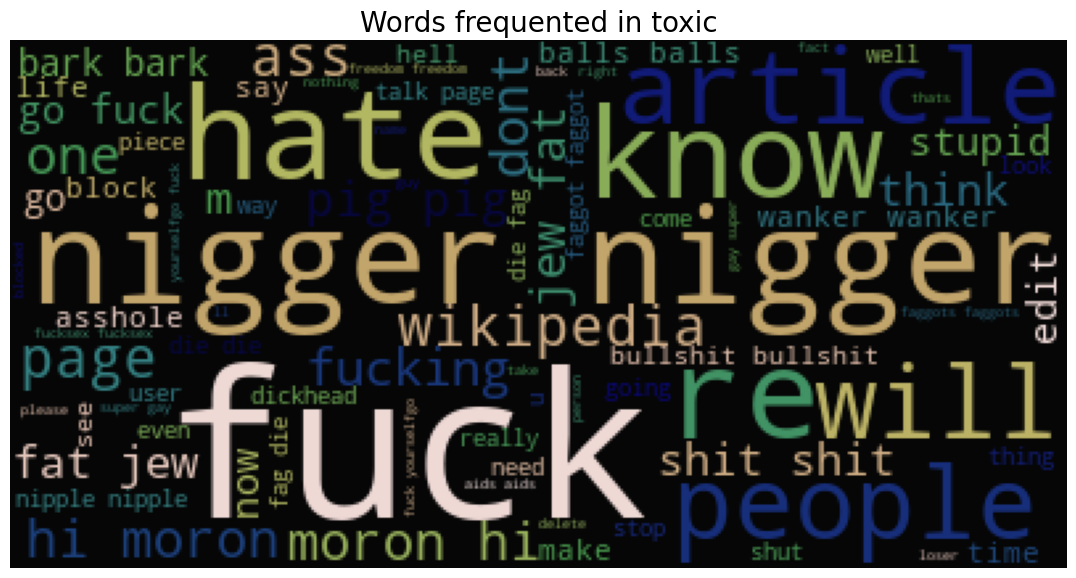

In [75]:
# For Toxic feature
subset=df[df['toxic']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('toxic'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

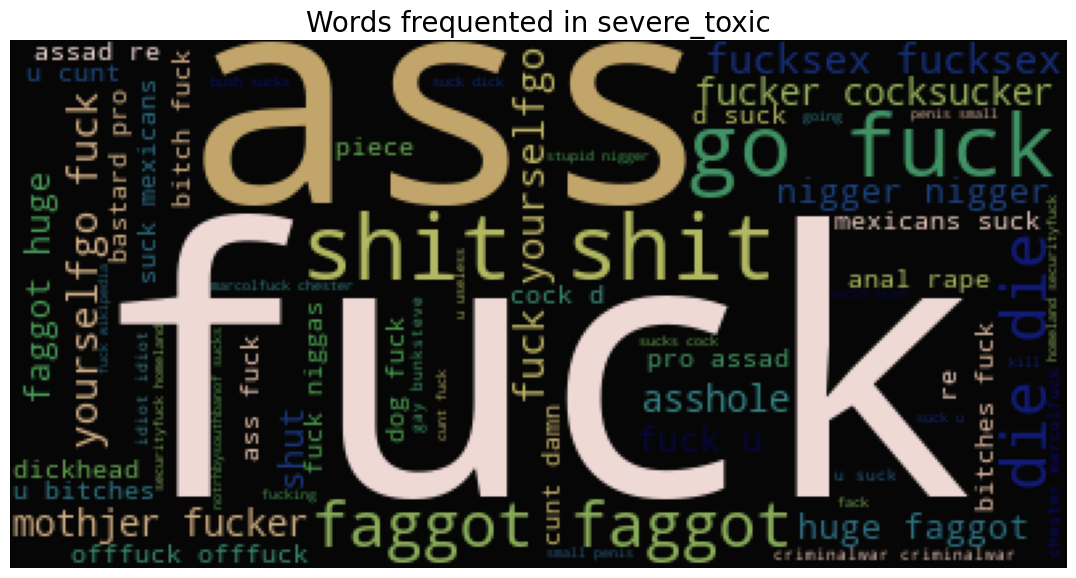

In [76]:
# For Severe Toxic feature
subset=df[df['severe_toxic']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('severe_toxic'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

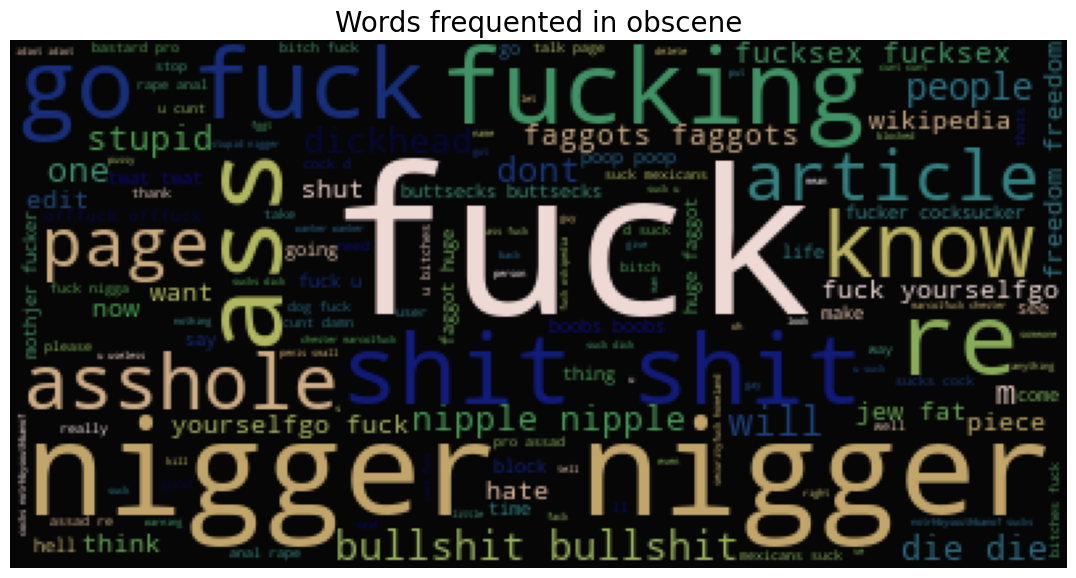

In [77]:
# For obscene feature
subset=df[df['obscene']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('obscene'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

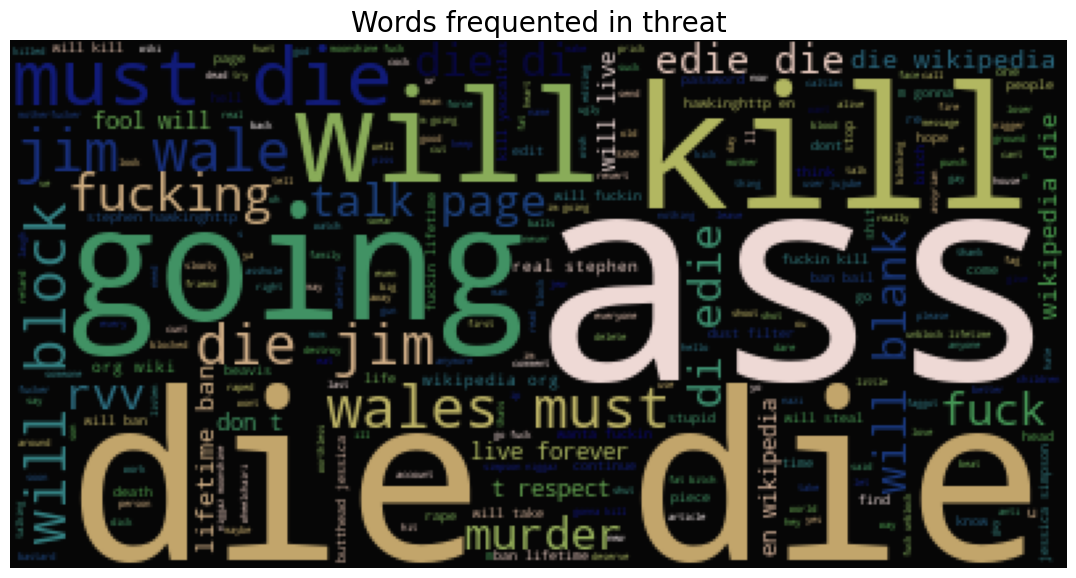

In [78]:
# For threat feature
subset=df[df['threat']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('threat'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

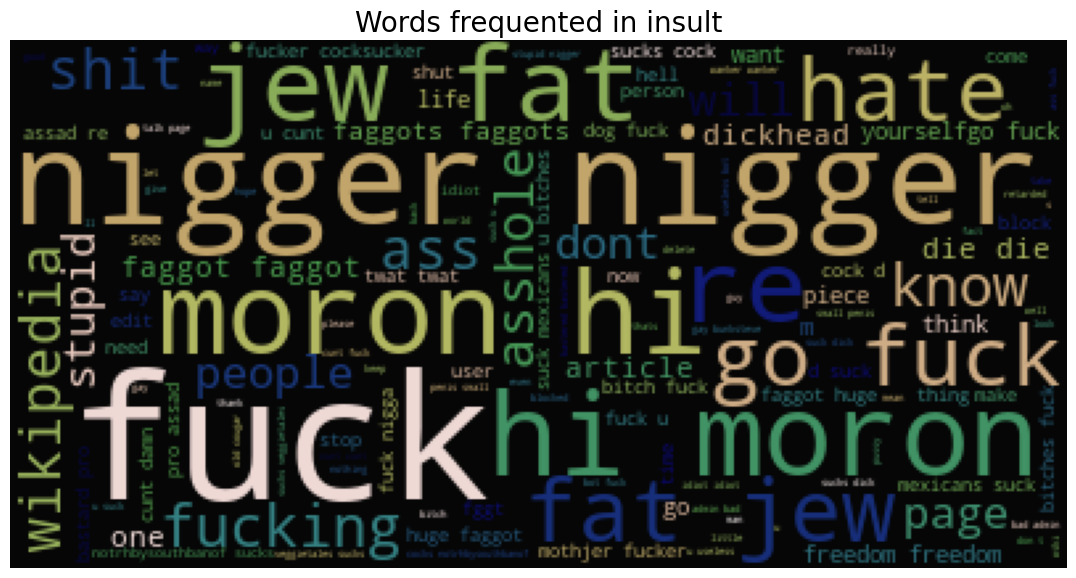

In [79]:
# For insult feature
subset=df[df['insult']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('insult'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

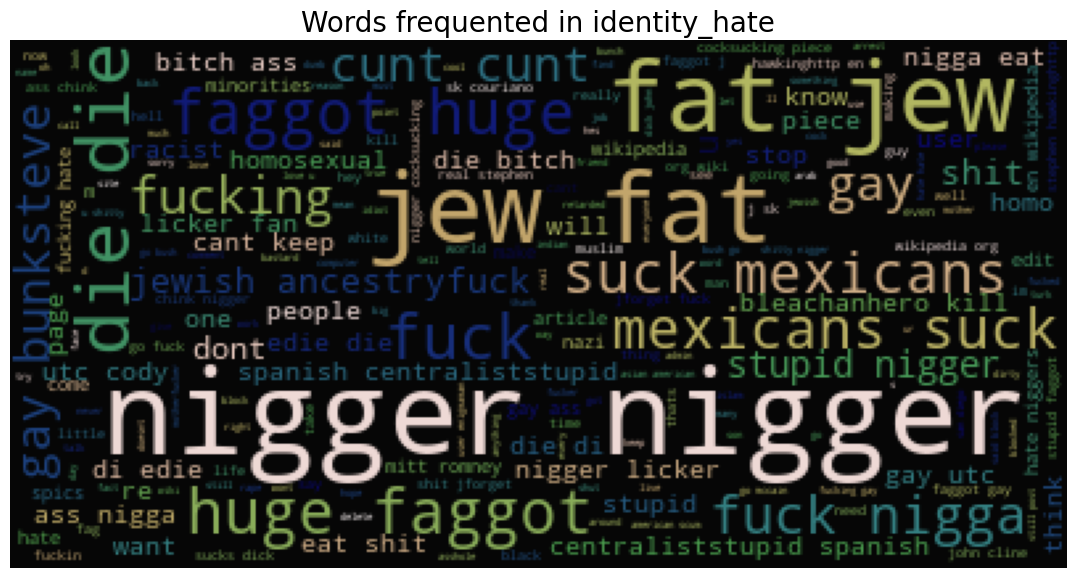

In [80]:
# For identity_hate feature
subset=df[df['identity_hate']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(30,30))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in {}".format('identity_hate'), fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
plt.show()

- From above wordcloud we can see the most frequent words in each of the feature indicating the comment being toxic in that level.

- will try to test on the entire dataset, see accuracy. i

- we saw that there are about 15294 set of comments which are toxic out of the entire dataset (159571). This would create class imbalance issue. So we can take non toxic such that they are about 50% of rest so that data is not imbalanced. 
-  such that they are good at all feature level


In [81]:

data_tox = df[df['toxic'] == 1].iloc[0:5000,:]
data_tox.shape

data_not_tox = df[df['toxic'] == 0].iloc[0:5000,:]

final_dataset = pd.concat([data_tox, data_not_tox], axis=0)
final_dataset.shape

#pip install scikit-learn
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = final_dataset.comment_text
y = final_dataset['toxic']

# Split our data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# Runnign Models on the data

In [83]:
# Import package for splitting data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score,precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, accuracy_score

# IMmport ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [92]:
def model_check(df, label, vectorizer, ngram):
    
    # figure the explanatory variable & Response variable i.e. the text on which we need to figure their toxicity
    X = df.comment_text
    y = df[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 17)

    # Create a Vectorizer and further remove stopwords from the table
    vect1 = vectorizer(ngram_range= (ngram), stop_words='english')

    X_train_vec1 = vect1.fit_transform(X_train) # to learn the vocabulory and retirn term-document matrix
    X_test_vec1 = vect1.transform(X_test) # transform all the learning from X_train to the X_test samples

    lr = LogisticRegression()
    lr.fit(X_train_vec1, y_train)
    print('Logistic Regression fit done!')
    # Test 
    lr_y_test=lr.predict(X_test_vec1)

    knn = KNeighborsClassifier()
    knn.fit(X_train_vec1, y_train)
    print('KNeighborsClassifier fit done!')
    knn_y_test=knn.predict(X_test_vec1)

    bnb = BernoulliNB()
    bnb.fit(X_train_vec1, y_train)
    print('BernoulliNB fit done!')
    bnb_y_test=bnb.predict(X_test_vec1)


    mnb = MultinomialNB()
    mnb.fit(X_train_vec1, y_train)
    print('MultinomialNB fit done!')
    mnb_y_test=mnb.predict(X_test_vec1)


    svm = LinearSVC()
    svm.fit(X_train_vec1, y_train)
    print('Support Vector Classifier fit done!')
    svm_y_test=svm.predict(X_test_vec1)


    randomforest = RandomForestClassifier(n_estimators= 100, random_state= 17)
    randomforest.fit(X_train_vec1, y_train)
    print('RandomForestClassifier fit done!')
    randomforest_y_test=randomforest.predict(X_test_vec1)


    #Calculate the accuracy of all Models
    metric_data = {
        'Accuracy' : [accuracy_score(lr_y_test,y_test),
                      accuracy_score(knn_y_test,y_test),
                      accuracy_score(bnb_y_test,y_test),
                      accuracy_score(mnb_y_test,y_test),
                      accuracy_score(svm_y_test,y_test),
                      accuracy_score(randomforest_y_test,y_test),
                      ],
        'F1 Score':[f1_score(lr_y_test,y_test), f1_score(knn_y_test,y_test), 
                                f1_score(bnb_y_test,y_test), f1_score(mnb_y_test,y_test),
                                f1_score(svm_y_test,y_test), f1_score(randomforest_y_test,y_test)]
    }

    df_metric = pd.DataFrame(metric_data,
                             index = ['Logistic Regression', 'KNN', 'BernoulliNB', 'MultinomialNB','Support Vector Classifier','Random Forest'])
    
    return metric_data





In [93]:
import time

t0=time.time()
df_tox_cv = model_check(df,'toxic',TfidfVectorizer,(1,1))
df_tox_cv.rename(columns = {'Accuracy': 'Accuracy for TOXIC (label)'}, inplace = True)

t1 = time.time()

print("Time taken for the whole model check".format(t1-t0))

df_tox_cv

Logistic Regression fit done!
KNeighborsClassifier fit done!
BernoulliNB fit done!
MultinomialNB fit done!
Support Vector Classifier fit done!
